In the scenario where the population follows to a normal distribution with a population variance of σ², and samples of size 'n' are drawn from it resulting in an unbiased variance of s², the ensuing χ² statistic adheres to a chi-square distribution with (n-1) degrees of freedom.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_each(
        data1, data2, sample_size_list, color1="navy", color2="darkgoldenrod",
        alpha=0.6):
    # plot
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1)
    plt.rcParams["font.size"] = 16
    ax.set_xlabel("#sample")
    ax.set_ylabel("std")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    xtick = [str(v) for v in sample_size_list]
    new_data1 = [[] for v in range(np.min(sample_size_list) - 1)] + data1
    new_data2 = [[] for v in range(np.min(sample_size_list) - 1)] + data2
    ax.boxplot(
        new_data1,
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor=color1,
                    color='black', linewidth=1, alpha=alpha),
        medianprops=dict(color='black', linewidth=1),
        whiskerprops=dict(color='black', linewidth=1),
        capprops=dict(color='black', linewidth=1),
        flierprops=dict(markeredgecolor='black', markeredgewidth=1)
    )
    ax.boxplot(
        new_data2,
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor=color2,
                    color='black', linewidth=1, alpha=alpha),
        medianprops=dict(color='black', linewidth=1),
        whiskerprops=dict(color='black', linewidth=1),
        capprops=dict(color='black', linewidth=1),
        flierprops=dict(markeredgecolor='black', markeredgewidth=1)
    )
    # legend
    leg_up, = plt.plot([1, 1], color1, linewidth=10, alpha=alpha)
    leg_low, = plt.plot([1, 1], color2, linewidth=10, alpha=alpha)
    plt.legend((leg_up, leg_low), ("upper", "lower"), frameon=False)
    leg_up.set_visible(False)
    leg_low.set_visible(False)
    plt.xticks(sample_size_list, xtick)
    plt.xlim(np.min(sample_size_list) - 1, np.max(sample_size_list) + 1)
    plt.tight_layout()
    plt.show()

100%|██████████| 10/10 [00:00<00:00, 104.66it/s]


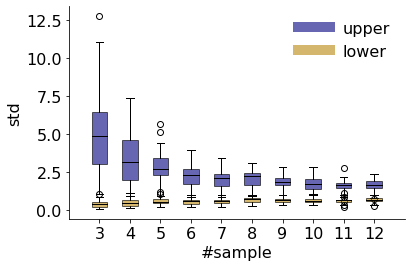

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

np.random.seed(1)

n_iter = 50
size_range = (3, 13)

h_pop_mean = 0.0
h_pop_std = 1.0
h_pop_var = h_pop_std ** 2

prob_lower = 0.025
prob_upper = 1 - prob_lower

sample_size_list = list(range(size_range[0], size_range[1]))
std_cil_list = [] # left
std_cir_list = [] # right
for n in tqdm(sample_size_list):
    tmp_cil = []
    tmp_cir = []
    for i in range(n_iter):
        h_smp = stats.norm.rvs(loc=h_pop_mean, scale=h_pop_std, size=n) # sampling
        uvar = np.var(h_smp, ddof=1)
        chil = stats.chi2.ppf(prob_lower, df=n - 1)
        chir = stats.chi2.ppf(prob_upper, df=n - 1)
        tmp_cil.append(np.sqrt((n - 1) * uvar / chil))
        tmp_cir.append(np.sqrt((n - 1) * uvar / chir))
    std_cil_list.append(tmp_cil)
    std_cir_list.append(tmp_cir)

plot_each(std_cil_list, std_cir_list, sample_size_list)